# Graph Structures
Using networkx package to build graph structures.

In [38]:
import networkx as nx

In [39]:
# preparing edges, nodes and weights
edgeList = [
['Udderslake','Rabbington',80],
['Rabbington', 'Beddleford',85],
['Beddleford','Wickbridge',173],
['Wickbridge','Dillchester',502],
['Dillchester','Reeshburg',84],
['Reeshburg','Udderslake',205],
['Wickbridge','Rydham',30],
['Rydham','Clamswood',183],
['Clamswood','Dillchester',167],
['Clamswood','Sheffelbrook',103],
['Sheffelbrook','Beddleford',217],
['Sheffelbrook','Bendon',186]]

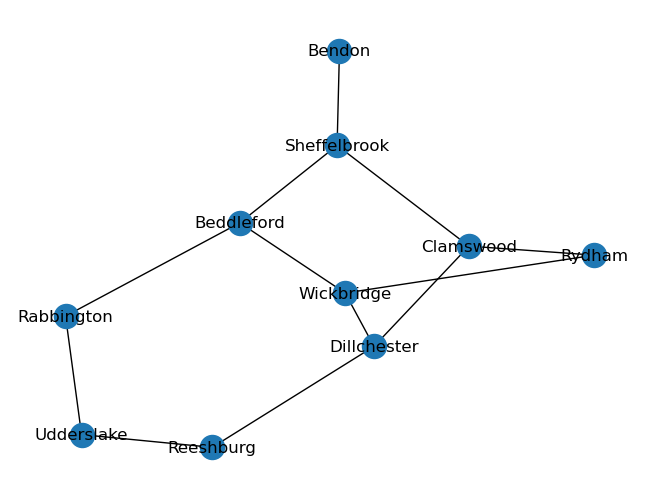

In [40]:
# Building and drawing the graph
# the spring layout produces a different look for the graph each time the code is ran
g = nx.Graph()
for edge in edgeList:
    g.add_edge(edge[0], edge[1], weight = edge[2])

nx.draw(g, pos=nx.spring_layout(g), with_labels=True)

In [41]:
# Calculating shortest paths between two cities (Dijkstra algorithm)
shortestPath = nx.shortest_path(g, 'Udderslake','Rydham', weight = 'weight')
dist = nx.shortest_path_length(g, 'Udderslake','Rydham', weight = 'weight')
print('Shorted path is:', shortestPath, '\nWith total distance of',dist,'km' )

Shorted path is: ['Udderslake', 'Rabbington', 'Beddleford', 'Wickbridge', 'Rydham'] 
With total distance of 368 km


In [42]:
# Calculating shortest paths between all pairs of cities
for paths in nx.all_pairs_dijkstra_path(g, weight = 'weight'):
    print(paths,"\n")

('Udderslake', {'Udderslake': ['Udderslake'], 'Rabbington': ['Udderslake', 'Rabbington'], 'Reeshburg': ['Udderslake', 'Reeshburg'], 'Beddleford': ['Udderslake', 'Rabbington', 'Beddleford'], 'Wickbridge': ['Udderslake', 'Rabbington', 'Beddleford', 'Wickbridge'], 'Sheffelbrook': ['Udderslake', 'Rabbington', 'Beddleford', 'Sheffelbrook'], 'Dillchester': ['Udderslake', 'Reeshburg', 'Dillchester'], 'Clamswood': ['Udderslake', 'Reeshburg', 'Dillchester', 'Clamswood'], 'Rydham': ['Udderslake', 'Rabbington', 'Beddleford', 'Wickbridge', 'Rydham'], 'Bendon': ['Udderslake', 'Rabbington', 'Beddleford', 'Sheffelbrook', 'Bendon']}) 

('Rabbington', {'Rabbington': ['Rabbington'], 'Udderslake': ['Rabbington', 'Udderslake'], 'Beddleford': ['Rabbington', 'Beddleford'], 'Reeshburg': ['Rabbington', 'Udderslake', 'Reeshburg'], 'Wickbridge': ['Rabbington', 'Beddleford', 'Wickbridge'], 'Sheffelbrook': ['Rabbington', 'Beddleford', 'Sheffelbrook'], 'Dillchester': ['Rabbington', 'Udderslake', 'Reeshburg', 'Dill

# Connected Components

In [48]:
component1_list = ['Rulwyn', 'Sandstead', 10]
g.add_edge(component1_list[0], component1_list[1], weight=component1_list[2])

component2_list = [
    ['Oldar', 'Skeldon', 20],
    ['Skeldon', 'Spoggridge', 35]
]

for edge in component2_list:
    g.add_edge(edge[0], edge[1], weight=edge[2])

nx.number_connected_components(g)

3

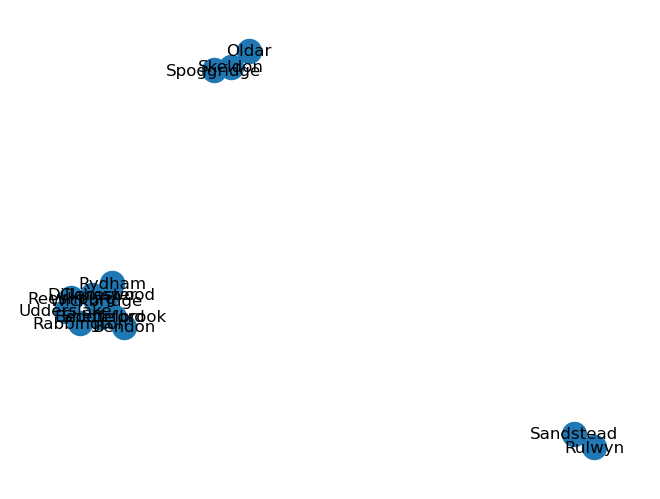

In [44]:
nx.draw(g, pos= nx.spring_layout(g) , with_labels=True)

In [49]:
# Determining connected components in a graph
for i,c in enumerate (nx.connected_components(g)):
    print(f'cc{i}:{c}')

cc0:{'Rydham', 'Reeshburg', 'Dillchester', 'Bendon', 'Sheffelbrook', 'Rabbington', 'Wickbridge', 'Udderslake', 'Beddleford', 'Clamswood'}
cc1:{'Rulwyn', 'Sandstead'}
cc2:{'Oldar', 'Skeldon', 'Spoggridge'}


# Spanning Tree
A spanning tree of an undirected graph G is a subgraph of G, that forms a tree and contains all the vertices of G.

A minimum spanning tree (MST) is a spanning tree with minimum weight

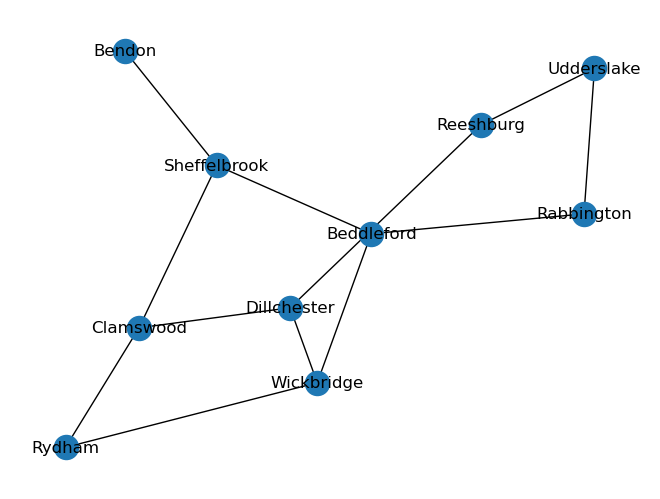

In [50]:
graph = nx.Graph()
for edge in edgeList:
    graph.add_edge(edge[0], edge[1], weight = edge[2])

nx.draw(graph, pos=nx.spring_layout(g), with_labels=True)

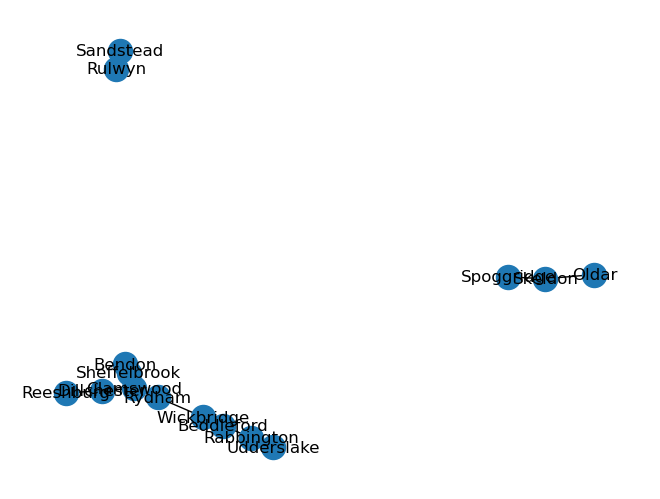

In [51]:
# calculate minimum spanning tree
mst = nx.minimum_spanning_tree(g)
nx.draw(mst, pos= nx.spring_layout(mst) , with_labels=True )

# Google page-rank algorithm

In [52]:
# Building up edges & nodes for directed graph
edgeList = [
# Nodes that point to A
['D','A'],
# Nodes that point to B
['C','B'],
['D','B'],
['E','B'],
['F','B'],
['G','B'],
['H','B'],
['I','B'],
# Nodes that point to C
['B','C'],
# Nodes that point to D
['E','D'],
# Nodes that point to E
['F','E'],
['G','E'],
['H','E'],
['I','E'],
['J','E'],
['K','E'],
# Nodes that point to F
['E','F'],
# No nodes that point to G,H,I,J,K
]

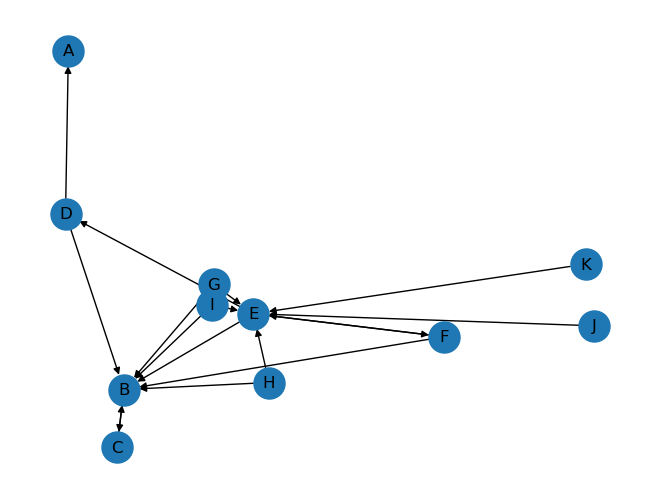

In [54]:
g = nx.DiGraph()
for edge in edgeList:
    g.add_edge(edge[0], edge[1])

nx.draw(g, pos=nx.spring_layout(g), with_labels=True, node_size=500)

In [56]:
# apply pagerank on graph
pageranks = nx.pagerank(g)
print(pageranks)

{'D': 0.039087092099966095, 'A': 0.03278149315934399, 'C': 0.3429125997558898, 'B': 0.38439863456604384, 'E': 0.08088569323449774, 'F': 0.039087092099966095, 'G': 0.016169479016858404, 'H': 0.016169479016858404, 'I': 0.016169479016858404, 'J': 0.016169479016858404, 'K': 0.016169479016858404}
